In [18]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


In [19]:
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [20]:
dataset=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
from sklearn.cluster import KMeans

In [22]:
X=dataset.iloc[:,[3,4]].values

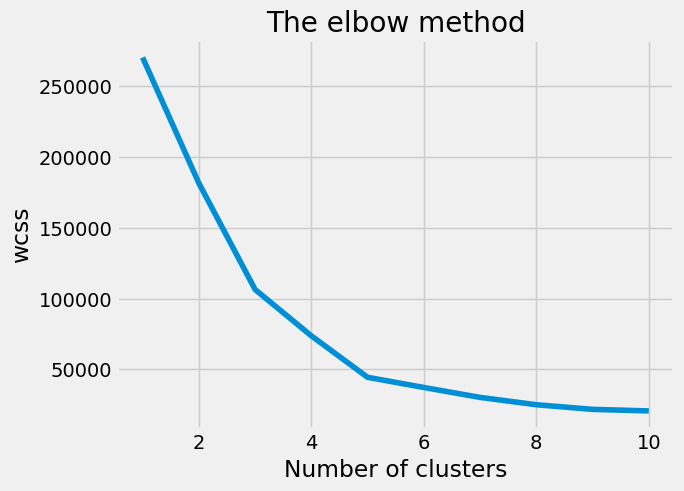

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)


In [26]:
y_kmeans = kmeans.fit_predict(X)


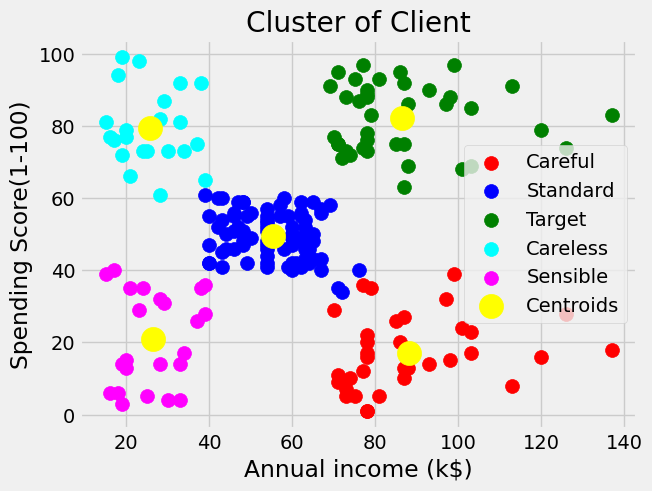

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Sensible')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
